In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#!gdown --id 1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D


In [3]:
df = pd.read_csv("used_cars.csv")

In [4]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
df.tail(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [11]:
x = df["model_year"]
x.head(5)
y = df["price"]
y.head(5)

0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
Name: price, dtype: object

In [8]:
print(type(y[0]))

<class 'str'>


In [9]:
#biến chuỗi thành số để chuyển str về số 
for i in range(len(y)):
    y[i] = int(y[i])
    #hoặc y[i] = int(y[i][1:]) 


ValueError: invalid literal for int() with base 10: '$10,300'

In [12]:
for i in range(len(y)):
    y[i] = int(y[i][1:].replace(",", "")) #slicing trước sau dấu $

C:\Users\Learning\AppData\Local\Temp\ipykernel_7332\1183111475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(",", "")) #slicing trước sau dấu $
C:\Users\Learning\AppData\Local\Temp\ipykernel_7332\1183111475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(",", "")) #slicing trước sau dấu $
C:\Users\Learning\AppData\Local\Temp\ipykernel_7332\1183111475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [21]:
print(type(y[0]))

<class 'int'>


In [22]:
y.head()

0    10300
1    38005
2    54598
3    15500
4    34999
Name: price, dtype: object

# xử lý x,y nên chú ý dtype


Split train and test set 

In [13]:
#split dataset
# 80% của x -> 80% * 4009  
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2


In [14]:
len(x) * TRAIN_RATIO

3207.2000000000003

In [15]:
x_train  =  x[ 0 : int(len(x) * TRAIN_RATIO)]
y_train =   y[ 0 : int(len(y) * TRAIN_RATIO)]
x_test   = x[int(len(x) * TRAIN_RATIO):]
y_test   = y[int(len(y) * TRAIN_RATIO):]   



In [16]:
y_train

0       10300
1       38005
2       54598
3       15500
4       34999
        ...  
3202     6700
3203    27700
3204    42500
3205    46500
3206    41598
Name: price, Length: 3207, dtype: object

In [17]:
y_test.tail(5)

4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, dtype: object

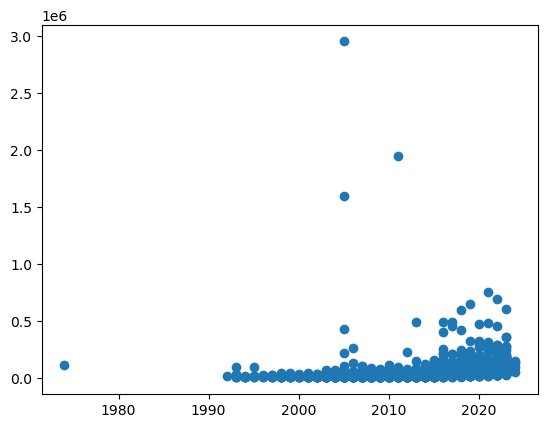

In [18]:
train_examples = list(zip(x_train,y_train))
plt.scatter(x_train,y_train)

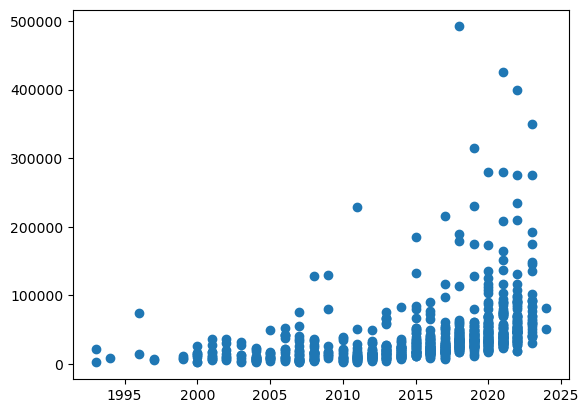

In [19]:
test_examples = list(zip(x_test,y_test))
plt.scatter(x_test,y_test)


In [20]:
print(train_examples)

[(2013, 10300), (2021, 38005), (2022, 54598), (2015, 15500), (2021, 34999), (2016, 14798), (2017, 31000), (2001, 7300), (2021, 41927), (2020, 69950), (2021, 73897), (2019, 184606), (2021, 53500), (2022, 62000), (2020, 47998), (2013, 29990), (2021, 250000), (2013, 16800), (2003, 11000), (2018, 68750), (2023, 60000), (2000, 4500), (2020, 38598), (2023, 58504), (2021, 61000), (2022, 32300), (2016, 13998), (2021, 59995), (2015, 25700), (2017, 21375), (2018, 48000), (2006, 10900), (2020, 24998), (2011, 5999), (2016, 46900), (2017, 15900), (2018, 33598), (2012, 8999), (2007, 8200), (2014, 20000), (2011, 79950), (2023, 45498), (2007, 14000), (2019, 75798), (2022, 119999), (2012, 36880), (2021, 43147), (2017, 29000), (2016, 17500), (2017, 30990), (2017, 52500), (2016, 20848), (2005, 19500), (2013, 73000), (2016, 19800), (2009, 7500), (2023, 30999), (2010, 6500), (2014, 28500), (2010, 10995), (2018, 42000), (2018, 144900), (2014, 10000), (2021, 23998), (2014, 21000), (2023, 67900), (2019, 69998

In [21]:
print(len(train_examples))

3207


In [22]:
x.min()

1974

Normalization

In [23]:
x_normalized = (x-min(x))/(max(x)-min(x))
y_normalized = (y-min(y))/(max(y)-min(y))


In [24]:
x_train  =  x_normalized[ 0 : int(len(x) * TRAIN_RATIO)]
y_train =   y_normalized[ 0 : int(len(y) * TRAIN_RATIO)]
x_test   = x_normalized[int(len(x) * TRAIN_RATIO):]
y_test   = y_normalized[int(len(y) * TRAIN_RATIO):]   



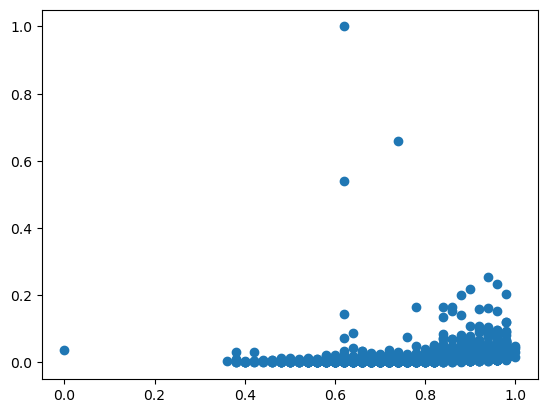

In [25]:
train_examples = list(zip(x_train,y_train))
plt.scatter(x_train,y_train)

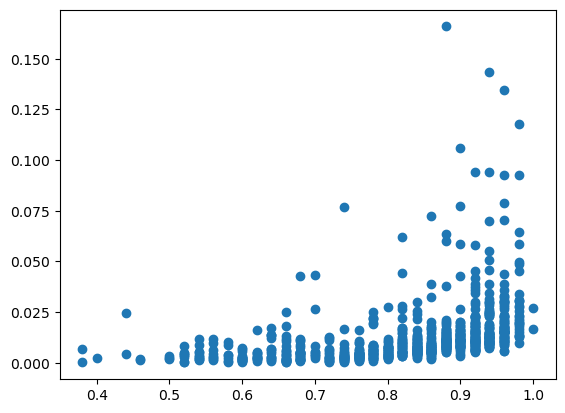

In [26]:
train_examples = list(zip(x_test,y_test))
plt.scatter(x_test,y_test)

LINEAR MODEL

In [31]:
def phi(x):
    return np.array([x,1])  #feature vector [0,0].T @ [x,1] dùng để * với w transpose 


def initialWeightVector():
    return np.ones(2) #w = [0,0]

def trainloss(w):
    return (1.0 / len(train_examples)) * sum((w.dot(phi(x_i))-y_i)**2 for x_i , y_i in train_examples)

def gradientTrainloss(w):
    return (1.0 / len(train_examples)) * sum(2*(w.dot(phi(x_i))-y_i)* phi(x_i) for x_i , y_i in train_examples)

def gradientDescent(L, gradientL , initialWeightVector,lr=0.01 , max_iters = 2000 , step =2):
    w= initialWeightVector()
    history = []
    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w- lr * gradient
        history.append(value)
        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w} , Trainloss = {value:.6f},Gradient_norm = {grad_norm:.6f}")
        w = w_new
    return w,history

In [32]:
w,history = gradientDescent( trainloss, gradientTrainloss , initialWeightVector,lr=0.001 , max_iters = 1500 , step =100)

Epoch 0: Weight Vector = [1. 1.] , Trainloss = 3.302359,Gradient_norm = 4.723793
Epoch 100: Weight Vector = [0.74280113 0.6917964 ] , Trainloss = 1.678349,Gradient_norm = 3.367466
Epoch 200: Weight Vector = [0.55942357 0.47210911] , Trainloss = 0.853046,Gradient_norm = 2.400577
Epoch 300: Weight Vector = [0.42867132 0.31552269] , Trainloss = 0.433636,Gradient_norm = 1.711307
Epoch 400: Weight Vector = [0.33543427 0.20391915] , Trainloss = 0.220497,Gradient_norm = 1.219945
Epoch 500: Weight Vector = [0.26894087 0.12438266] , Trainloss = 0.112182,Gradient_norm = 0.869667
Epoch 600: Weight Vector = [0.22151233 0.06770587] , Trainloss = 0.057138,Gradient_norm = 0.619963
Epoch 700: Weight Vector = [0.18767469 0.02732512] , Trainloss = 0.029165,Gradient_norm = 0.441956
Epoch 800: Weight Vector = [ 0.16352567 -0.00143866] , Trainloss = 0.014949,Gradient_norm = 0.315060
Epoch 900: Weight Vector = [ 0.14628346 -0.02192106] , Trainloss = 0.007725,Gradient_norm = 0.224599
Epoch 1000: Weight Vecto

![Alt text](chuthich.png)


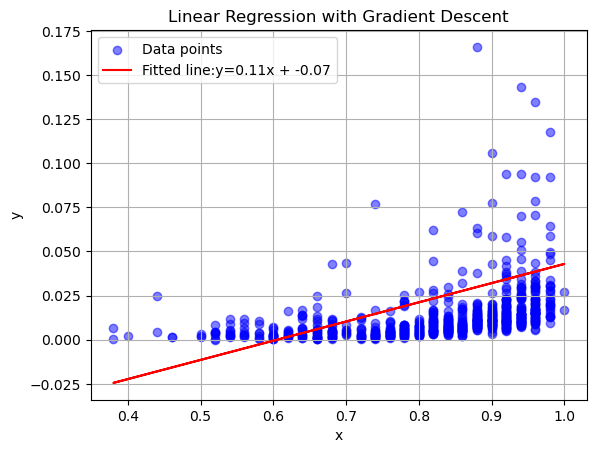

In [33]:
plt.scatter(x_test,y_test, color = 'blue',label= 'Data points',alpha=   0.5)
y_predict = w[0] * x_test +w[1]
plt.plot(x_test,y_predict,color= 'red',label =f'Fitted line:y={w[0]:.2f}x + {w[1]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()         

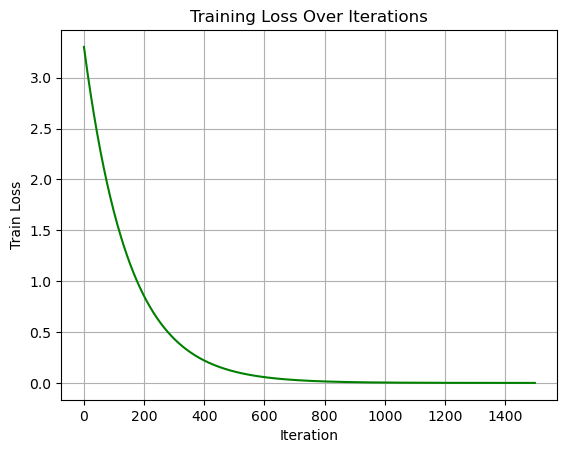

In [34]:
plt.plot(history,color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss Over Iterations')
plt.grid(True)
plt.show()